# Known Exploit Vulnerability Project Report

**Goal**: Predict whether a vulnerability is associated with a known ransomware campaign.

**Approach**: Use features such as cveID, vendorProject, product, vulnerabilityName, shortDescription, and dateAdded to build a binary classification model to classify vulnerabilities as known or unknown for ransomware campaigns.

In [3]:
import sys
sys.path.append("./util_")
import _utility

## Wrangle

#### Dataset Information
- **Size**: 1,140 rows × 11 columns
- **Column Types**: 1 numeric, 10 string/object
- **Null Values**: The numeric column `cwes` is entirely null
- **Notes**: The `notes` column has 373 non-null rows
- **Descriptive Stats**: No information on the `cwes` column due to its null values

#### Data Preparation Steps
- **Feature Engineering**: 
  - Created three new features: `vulnerability_type`, `required_action_new`, and `product_category`.
  - These were derived by mapping and categorizing similar entries from the original columns: `vulnerability_name`, `required_action`, and `product`.
  - This process consolidated numerous discrete categories into more manageable and visually appealing groups.

- **Dummy Variable Creation**:
  - Encoded all categorical variables into binary (`0` and `1`) format.
  - The target feature `known_ransomware_campaign_use` was encoded as `0` for Unknown and `1` for Known ransomware campaigns.

- **Feature Removal**:
  - Removed features with null values and those that added no value: `notes`, `short_description`, `vulnerability_name`, `due_date`, `required_action`, and `product`.
  - The original columns from which new features were engineered were also removed.

- **Data Splitting**:
  - Split the data into training (60%), validation (20%), and testing (20%) sets with a random state of 10.
  - Stratification was avoided to prevent data leakage and ensure reliability.

- **Data Storage**:
  - Saved six datasets as `.csv` files in the `./data` folder:
    1. Original data
    2. Prepared data with dummies
    3. Prepared data without dummies
    4. Training set with dummies
    5. Validation set with dummies
    6. Testing set with dummies


## Explore

### Univariate Analysis

- **`VENDOR_PROJECT`**: Represents companies that contributed CVE IDs to the KEV catalog. The top contributors are:
    - Microsoft: 170 CVEs
    - Apple: 49 CVEs
    - Adobe: 45 CVEs
    - Cisco: 42 CVEs
    - Google: 30 CVEs

- **`KNOWN_RANSOMWARE_CAMPAIGN_USE`**: This is the target variable with two attributes: `known` and `unknown` ransomware campaigns.
    - `known`: 141 instances
    - `unknown`: 518 instances (expected to be higher)

- **`VULNERABILITY_TYPE`**: Groups vulnerabilities based on the `vulnerability_name` feature. The most common types are:
    - Remote Code Execution Vulnerability: 104 instances
    - Privilege Escalation Vulnerability: 84 instances
    - Command Injection Vulnerability: 63 instances
    - Buffer Overflow Vulnerability: 45 instances
    - Memory Corruption Vulnerability: 41 instances

- **`REQUIRED_ACTION_NEW`**: Originally `required_action`, this feature represents actions to be taken for specific vulnerabilities. The most common actions are:
    - Apply Updates: 503 instances
    - Apply Mitigations or Discontinue: 88 instances
    - End of Life Disconnect: 31 instances
    - Apply Updates or Discontinue: 12 instances
    - Apply Remediations or Discontinue: 7 instances

- **`PRODUCT_CATEGORY`**: Previously known as `product`, this feature groups products into relevant categories. Excluding miscellaneous products, the top categories are:
    - Operating Systems: 106 instances
    - Networking: 83 instances
    - Other: 74 instances
    - Development and Frameworks: 62 instances
    - Microsoft Products: 61 instances

### Bivariate Analysis

#### Relationship Between `known_ransomware_campaign_use` and Other Features

- **With `vulnerability_type`**:
    - Visual 1.2 shows a strong relationship. The most impactful vulnerabilities are:
        - Remote Code Execution Vulnerability: 26 known, 78 unknown
        - Privilege Escalation Vulnerability: 26 known, 58 unknown
        - Command Injection Vulnerability: 19 known, 44 unknown

- **With `required_action`**:
    - Visual 1.3 shows a weaker relationship. The most impactful action is:
        - Apply Updates: 110 known, 393 unknown

- **With `product_category`**:
    - Visual 1.4 shows a strong relationship. The most impactful categories are:
        - Operating Systems: 23 known, 83 unknown
        - Microsoft Products: 19 known, 42 unknown
        - Development and Frameworks: 11 known, 51 unknown
        - Security: 18 known, 41 unknown

#### Relationships Between Features (Excluding Target)

- **Between `vulnerability_type` and `required_action`**:
    - Visual 2.4 shows a skewed relationship. The most impactful actions are:
        - Apply Updates
        - Apply Mitigations and Discontinue

- **Between `vulnerability_type` and `product_category`**:
    - Visual 2.5 shows a moderate relationship. The most impactful categories are:
        - Microsoft Products
        - Browsers

- **Between `required_action` and `product_category`**:
    - Visual 2.6 shows a moderate relationship with no clear dominant category.


### Stats Testing

1. **Association Between `vendorProject` and Ransomware Campaign Likelihood**
    - **Observation**: The "Meta" platform shows the strongest relationship with ransomware campaigns, with over 100 instances in unknown campaigns and over 40 in known campaigns. Microsoft is the most represented vendor, appearing in 22% of the dataset.
    - **Statistical Conclusion**: The chi-squared test provides sufficient evidence to reject the null hypothesis. This indicates a statistically significant association between the `vendorProject` and the likelihood of a vulnerability being associated with a ransomware campaign.

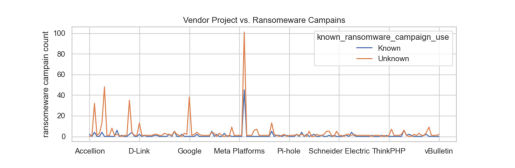

In [8]:
_utility.load_png_from_dir(filename="04_stats_test_viz/vendor_project_vs._ransomeware_campains.png")

2. **Influence of `vulnerability_type` on Ransomware Association**
    - **Observation**: "Remote Code Execution" and "Privilege Escalation" vulnerabilities show the strongest relationships with ransomware campaigns. "Remote Code Execution" is the most frequent, appearing in 15.78% of the dataset.
    - **Statistical Conclusion**: The chi-squared test provides sufficient evidence to reject the null hypothesis. This suggests that the `vulnerability_type` significantly influences whether a vulnerability is associated with a ransomware campaign.

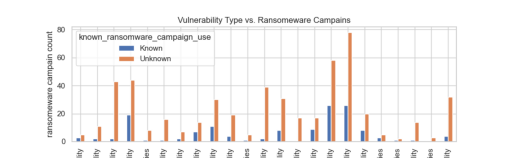

In [9]:
_utility.load_png_from_dir(filename="04_stats_test_viz/vulnerability_type_vs._ransomeware_campains.png")

3. **Impact of `dateAdded` on Ransomware Association**
    - **Observation**: The year 2022 has the highest number of reported incidents, with a decreasing trend in subsequent years. The months of March and November contribute heavily to unknown ransomware campaigns.
    - **Statistical Conclusion**: The chi-squared test does not provide sufficient evidence to reject the null hypothesis. This indicates that `dateAdded` (year, month, and day) does not significantly affect the likelihood of a vulnerability being associated with a ransomware campaign.

**Month**

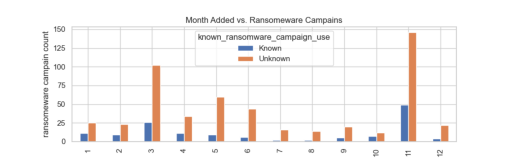

In [10]:
_utility.load_png_from_dir(filename="04_stats_test_viz/month_added_vs._ransomeware_campains.png")

**Year**

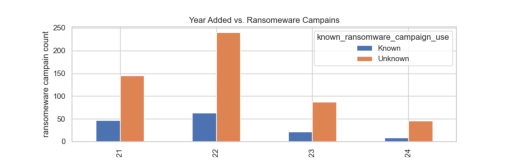

In [11]:
_utility.load_png_from_dir(filename="04_stats_test_viz/year_added_vs._ransomeware_campains.png")

4. **Likelihood of Ransomware Association by Product**
    - **Observation**: "Operating Systems" and "Networking" product categories show a skewed distribution, suggesting a stronger relationship with ransomware campaigns.
    - **Statistical Conclusion**: The chi-squared test provides sufficient evidence to reject the null hypothesis. This indicates that certain products are significantly more likely to be associated with vulnerabilities targeted by ransomware campaigns.

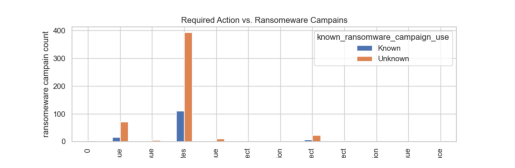

In [12]:
_utility.load_png_from_dir(filename="04_stats_test_viz/required_action_vs._ransomeware_campains.png")

5. **Impact of Required Action on Ransomware Association**
    - **Observation**: "Apply Updates" is the predominant action required, accounting for 76% of the data, which heavily skews the analysis.
    - **Statistical Conclusion**: The chi-squared test does not provide sufficient evidence to reject the null hypothesis. This suggests that the type of action required does not significantly affect its association with ransomware campaigns.

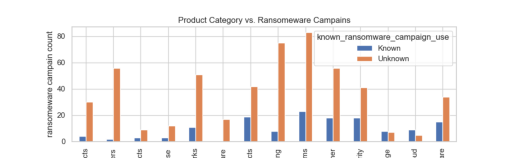

In [13]:
_utility.load_png_from_dir(filename="04_stats_test_viz/product_category_vs._ransomeware_campains.png")

### Modeling

I implemented 5 classification models in the atempt to predict whether a vulnerability is associated with a known ransomware campaign. 

1. K-nearest Neighbor (KNN)
2. Decision Tree
3. Random Forest
4. Logistic Regression
5. Support Vector Machine (SVM)

In [15]:
# Get all items in a directory
import os
directory_path = './00_project_visuals/05_modeling_viz'
items = os.listdir(directory_path)
items

['logistic_regression_model_score_by_inverse_of_regularization_strength.png',
 'knn_model_score_by_n-neighbors.png',
 'random_forest_model_score_by_number_of_trees.png',
 'support_vector_machine_model_by_cost_of_error.png',
 'decision_tree_model_score_by_depth.png']

**Decision Tree**

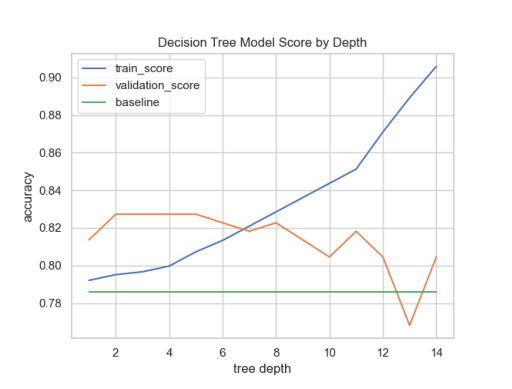

In [17]:
_utility.load_png_from_dir(filename="05_modeling_viz/decision_tree_model_score_by_depth.png")

**Random Forest**

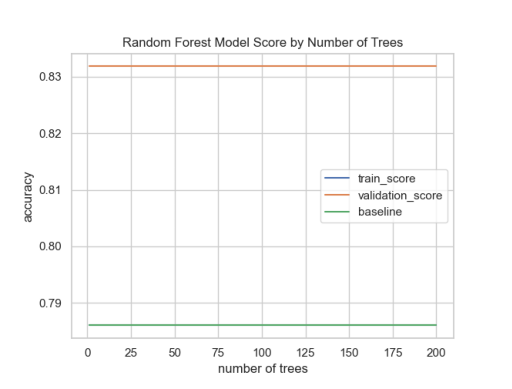

In [18]:
_utility.load_png_from_dir(filename="05_modeling_viz/random_forest_model_score_by_number_of_trees.png")

**Logistic Regression**

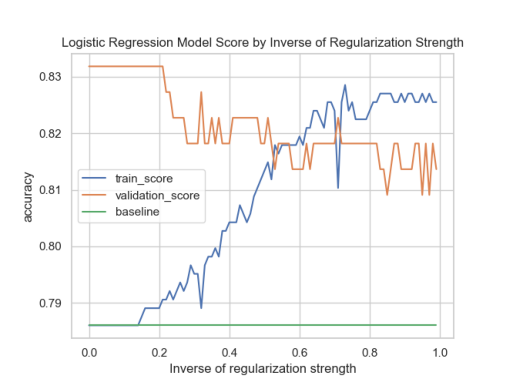

In [19]:
_utility.load_png_from_dir(filename="05_modeling_viz/logistic_regression_model_score_by_inverse_of_regularization_strength.png")

**Support Vector Machine (SVM)**

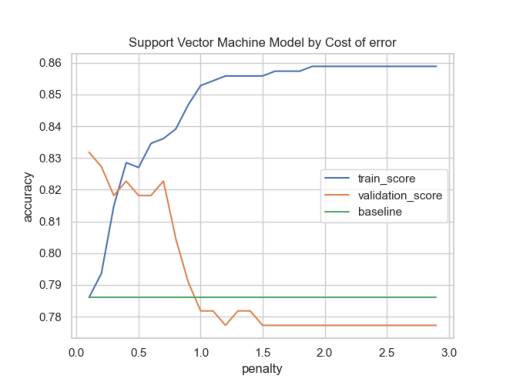

In [20]:
_utility.load_png_from_dir(filename="05_modeling_viz/support_vector_machine_model_by_cost_of_error.png")

### Best Model
**K-nearest Neighbor (KNN)**

I trust KNN as the best model because its training and validation results are consistently higher than most other models, and the absolute values of the results are always close to each other.

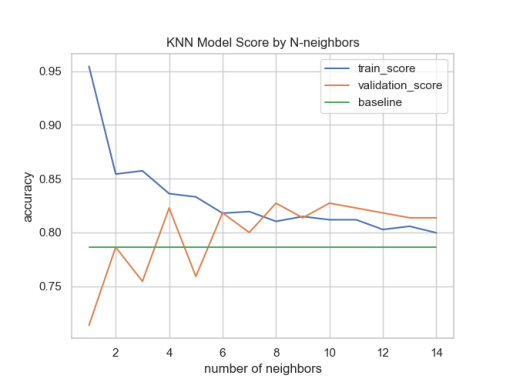

In [21]:
_utility.load_png_from_dir(filename="05_modeling_viz/knn_model_score_by_n-neighbors.png")

**Recommendation**

"The test performed only slightly better than the baseline, with an accuracy improvement of just 1.8%. Given the significance of the KEV project and its impact on Federal Civilian Executive Branches, I would not recommend any changes to their current policies on known exploited vulnerability infrastructure."